# Wine Dataset Analysis

## Table of Contents

* What is the count and percentage of high-quality wines (wines with a quality rating of >7) for red and white wine types, as well as the overall percentage of high-quality wines relative to the total wine dataset?
* How do the average values of features differ between high-quality and low-quality wines for both red and white wine types?
* How does the alcohol content distribution vary between high-quality and low-quality wines for red and white wine types?
* What are the differences in total sulfur dioxide content distribution between high-quality and low-quality wines for red and white wine types?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
red_wine_path = '/content/drive/My Drive/wine_quality/data/raw/winequality-red.csv'
red_wine = pd.read_csv(red_wine_path, sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
num_red_duplicates = red_wine.duplicated().sum()
num_red_duplicates

240

In [6]:
red_wine_cleaned = red_wine.drop_duplicates()
red_wine_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [7]:
white_wine_path = '/content/drive/My Drive/wine_quality/data/raw/winequality-white.csv'
white_wine = pd.read_csv(white_wine_path, sep=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
num_white_duplicates = white_wine.duplicated().sum()
num_white_duplicates

937

In [10]:
white_wine_cleaned = white_wine.drop_duplicates()
white_wine_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [11]:
red_wine_cleaned.to_csv('/content/drive/My Drive/wine_quality/data/raw/winequality_red_processed.csv', index=False)
white_wine_cleaned.to_csv('/content/drive/My Drive/wine_quality/data/raw/winequality_white_processed.csv', index=False)

## What is the count and percentage of high-quality wines (wines with a quality rating of >7) for red and white wine types, as well as the overall percentage of high-quality wines relative to the total wine dataset?

In [12]:
# High-quality wines for red and white
high_quality_red = red_wine_cleaned[red_wine_cleaned['quality'] > 7]
num_high_quality_red = len(high_quality_red)
percentage_high_quality_red = (num_high_quality_red / len(red_wine_cleaned)) * 100  # Relative to red wine total

high_quality_white = white_wine_cleaned[white_wine_cleaned['quality'] > 7]
num_high_quality_white = len(high_quality_white)
percentage_high_quality_white = (num_high_quality_white / len(white_wine_cleaned)) * 100  # Relative to white wine total

# Total percentage of high-quality wines (relative to total dataset)
total_wine_samples = len(red_wine_cleaned) + len(white_wine_cleaned)
total_high_quality = num_high_quality_red + num_high_quality_white
percentage_high_quality_total = (total_high_quality / total_wine_samples) * 100  # Overall percentage

print(f"Number of high-quality red wines: {num_high_quality_red}")
print(f"Percentage of high-quality red wines (of red wine samples): {percentage_high_quality_red:.2f}%")

print(f"Number of high-quality white wines: {num_high_quality_white}")
print(f"Percentage of high-quality white wines (of white wine samples): {percentage_high_quality_white:.2f}%")

print(f"Total number of high-quality wines (red + white): {total_high_quality}")
print(f"Percentage of high-quality wines (of total samples): {percentage_high_quality_total:.2f}%")

Number of high-quality red wines: 17
Percentage of high-quality red wines (of red wine samples): 1.25%
Number of high-quality white wines: 136
Percentage of high-quality white wines (of white wine samples): 3.43%
Total number of high-quality wines (red + white): 153
Percentage of high-quality wines (of total samples): 2.88%


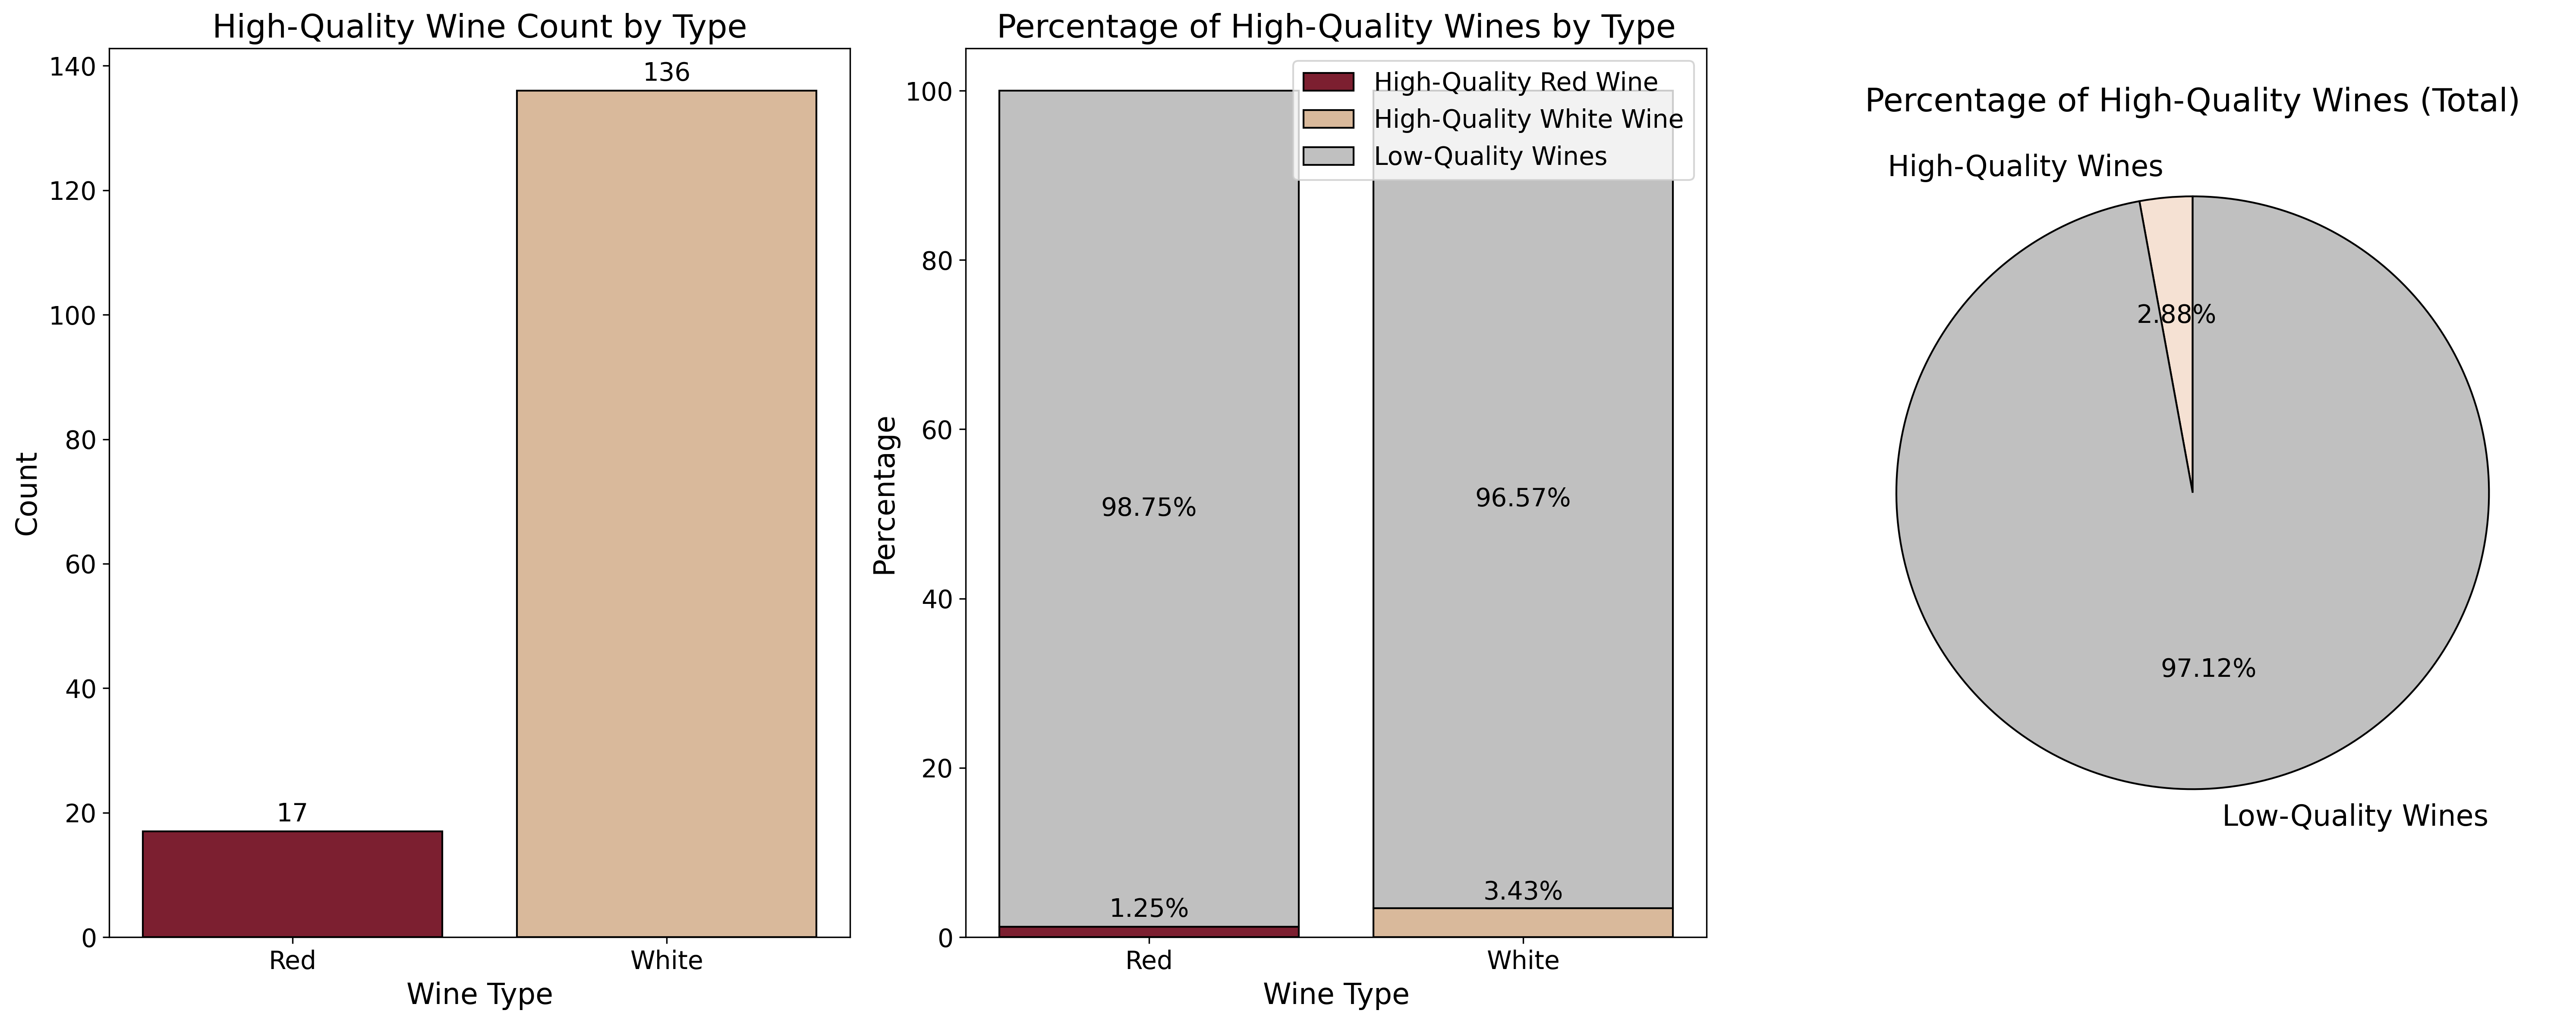

In [13]:
categories = ["Red", "White"]
high_quality_red = [percentage_high_quality_red, 0]
high_quality_white = [0, percentage_high_quality_white]
remaining_percentages = [100-percentage_high_quality_red, 100-percentage_high_quality_white]  # 98.75, 96.57
stacked_percentages = np.array([high_quality_red, high_quality_white, remaining_percentages])

stacked_colors = ["#7C1F30", "#D9B99B", "#C0C0C0"]
pie_colors = ["#F5E1D3", "#C0C0C0"]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# 1. Bar Chart for High-Quality Wine Count by Type
data_count = [num_high_quality_red, num_high_quality_white]
bars = axes[0].bar(categories, data_count, color=["#7C1F30", "#D9B99B"], edgecolor="black")
axes[0].set_title("High-Quality Wine Count by Type", fontsize=18)
axes[0].set_xlabel("Wine Type", fontsize=16)
axes[0].set_ylabel("Count", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

for bar, count in zip(bars, data_count):
  axes[0].text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.75,
      f"{count}",
      ha="center",
      va="bottom",
      fontsize=14,
      )

# 2. Stacked Bar Chart for Percentages
bar_bottom = np.zeros(len(categories))
labels = ["High-Quality Red Wine", "High-Quality White Wine", "Low-Quality Wines"]
for i, (perc, color) in enumerate(zip(stacked_percentages, stacked_colors)):
  axes[1].bar(categories, perc, bottom=bar_bottom, color=color, edgecolor="black", label=labels[i])
  bar_bottom += perc

axes[1].set_title("Percentage of High-Quality Wines by Type", fontsize=18)
axes[1].set_xlabel("Wine Type", fontsize=16)
axes[1].set_ylabel("Percentage", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)
axes[1].legend(fontsize=14, loc="upper right")

for i, total_perc in enumerate(stacked_percentages.T):
    # High-Quality Red
    if total_perc[0] > 0:
        axes[1].text(
            i, total_perc[0] / 0.7, f"{total_perc[0]:.2f}%", ha="center", va="bottom", fontsize=14
        )
    # High-Quality White
    if total_perc[1] > 0:
        axes[1].text(
            i, total_perc[0] + total_perc[1] / 0.9, f"{total_perc[1]:.2f}%", ha="center", va="bottom", fontsize=14
        )
    # Remaining Wines
    axes[1].text(
        i, total_perc[0] + total_perc[1] + total_perc[2] / 2, f"{total_perc[2]:.2f}%", ha="center", va="center", fontsize=14
        )

# 3. Pie Chart for Total High-Quality Percentage
pie_data = [percentage_high_quality_total, 100 - percentage_high_quality_total]
pie_labels = ["High-Quality Wines", "Low-Quality Wines"]
wedges, texts, autotexts = axes[2].pie(
    pie_data,
    labels=pie_labels,
    autopct="%.2f%%",
    startangle=90,
    colors=pie_colors,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 16}
)

for autotext in autotexts:
    autotext.set_fontsize(14)

axes[2].set_title("Percentage of High-Quality Wines (Total)", fontsize=18)

plt.tight_layout()

plt.savefig("/content/drive/My Drive/wine_quality/images/q1.png", transparent=True)

**Count of High-Quality Wines:**

* Red Wine: There are **17** high-quality red wines.
* White Wine: There are **136** high-quality white wines.

**Percentage of High-Quality Wines by Wine Type:**

* Red Wine: High-quality red wines constitute **1.25%** of all red wine samples.
* White Wine: High-quality white wines constitute **3.43%** of all white wine samples.

**Overall Percentage of High-Quality Wines:**

Across all wine samples (red and white), high-quality wines make up **2.88%** of the total dataset, while the remaining **97.12%** are low-quality wines.

## How do the average values of features differ between high-quality and low-quality wines for both red and white wine types?

In [14]:
high_quality_red = red_wine_cleaned[red_wine_cleaned["quality"] > 7]
low_quality_red = red_wine_cleaned[red_wine_cleaned["quality"] <= 7]

high_quality_white = white_wine_cleaned[white_wine_cleaned["quality"] > 7]
low_quality_white = white_wine_cleaned[white_wine_cleaned["quality"] <= 7]

features = [col for col in red_wine.columns if col != 'quality']

high_quality_red_means = high_quality_red[features].mean()
low_quality_red_means = low_quality_red[features].mean()
high_quality_white_means = high_quality_white[features].mean()
low_quality_white_means = low_quality_white[features].mean()

red_comparison_df = pd.DataFrame({
    "Feature": features,
    "High-Quality Red Mean": high_quality_red_means.values,
    "Low-Quality Red Mean": low_quality_red_means.values
})
red_comparison_df["Difference (High-Quality - Low-Quality)"] = (
    red_comparison_df["High-Quality Red Mean"] - red_comparison_df["Low-Quality Red Mean"]
)

white_comparison_df = pd.DataFrame({
    "Feature": features,
    "High-Quality White Mean": high_quality_white_means.values,
    "Low-Quality White Mean": low_quality_white_means.values
})
white_comparison_df["Difference (High-Quality - Low-Quality)"] = (
    white_comparison_df["High-Quality White Mean"] - white_comparison_df["Low-Quality White Mean"]
)

red_comparison_df = red_comparison_df.sort_values(by="Difference (High-Quality - Low-Quality)", ascending=False)
white_comparison_df = white_comparison_df.sort_values(by="Difference (High-Quality - Low-Quality)", ascending=False)

print("Red Wine Feature Comparison:")
print(red_comparison_df)

Red Wine Feature Comparison:
                 Feature  High-Quality Red Mean  Low-Quality Red Mean  \
10               alcohol              12.158824             10.410445   
0          fixed acidity               8.441176              8.308942   
9              sulphates               0.774706              0.657235   
2            citric acid               0.382941              0.270931   
3         residual sugar               2.576471              2.522727   
7                density               0.995095              0.996729   
4              chlorides               0.068353              0.088374   
8                     pH               3.274118              3.310238   
1       volatile acidity               0.427647              0.530768   
5    free sulfur dioxide              13.764706             15.920268   
6   total sulfur dioxide              34.470588             46.982489   

    Difference (High-Quality - Low-Quality)  
10                                 1.748379  
0 

In [15]:
print("White Wine Feature Comparison:")
print(white_comparison_df)

White Wine Feature Comparison:
                 Feature  High-Quality White Mean  Low-Quality White Mean  \
10               alcohol                11.891176               10.543071   
5    free sulfur dioxide                35.536765               34.866144   
8                     pH                 3.237794                3.193953   
1       volatile acidity                 0.287206                0.280301   
2            citric acid                 0.336912                0.334241   
7                density                 0.991735                0.993863   
9              sulphates                 0.485147                0.490536   
4              chlorides                 0.036412                0.046243   
0          fixed acidity                 6.639706                6.846444   
3         residual sugar                 5.022059                5.946562   
6   total sulfur dioxide               121.812500              137.740392   

    Difference (High-Quality - Low-Quality) 

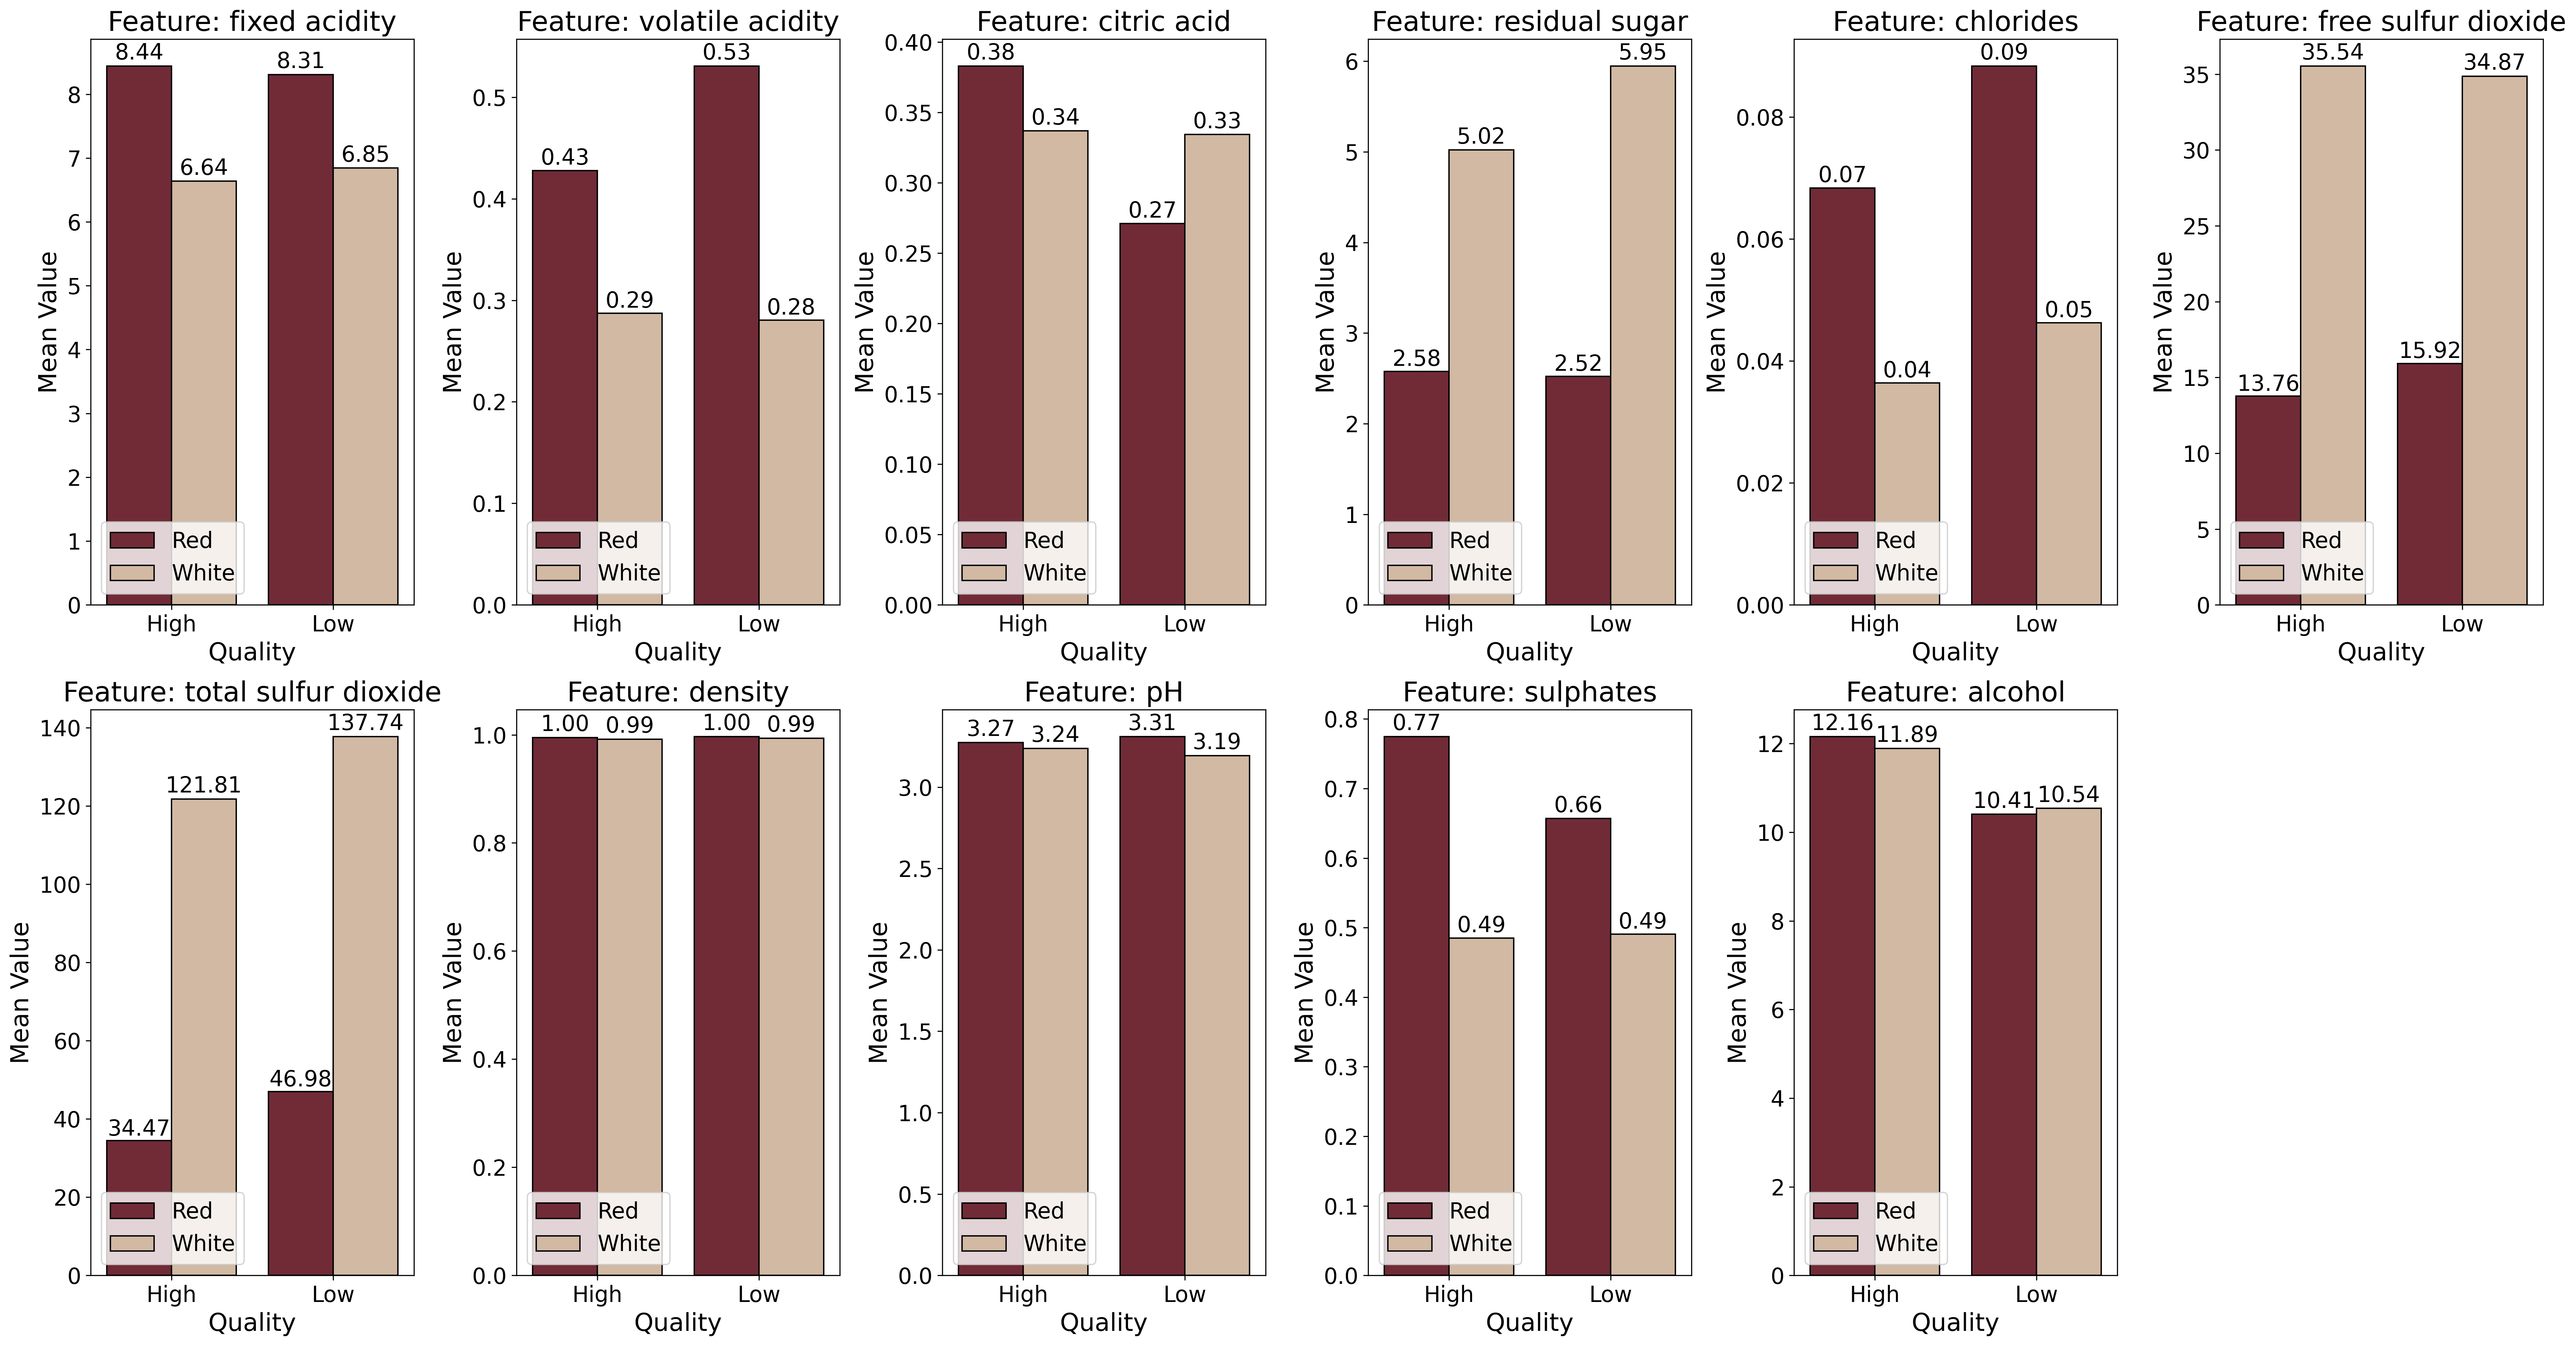

In [16]:
visualization_data = []
for feature in features:
    visualization_data.append({
        "Feature": feature,
        "Wine Type": "Red",
        "Quality": "High",
        "Mean Value": high_quality_red[feature].mean()
    })
    visualization_data.append({
        "Feature": feature,
        "Wine Type": "Red",
        "Quality": "Low",
        "Mean Value": low_quality_red[feature].mean()
    })
    visualization_data.append({
        "Feature": feature,
        "Wine Type": "White",
        "Quality": "High",
        "Mean Value": high_quality_white[feature].mean()
    })
    visualization_data.append({
        "Feature": feature,
        "Wine Type": "White",
        "Quality": "Low",
        "Mean Value": low_quality_white[feature].mean()
    })

viz_df = pd.DataFrame(visualization_data)

num_features = len(features)
fig, axes = plt.subplots(nrows=(num_features // 6 + num_features % 2), ncols=6, figsize=(26, num_features * 1.25))
axes = axes.flatten()

for i, feature in enumerate(features):
    feature_data = viz_df[viz_df["Feature"] == feature]
    bars = sns.barplot(
        ax=axes[i],
        data=feature_data,
        x="Quality",
        y="Mean Value",
        hue="Wine Type",
        palette={"Red": "#7C1F30", "White": "#D9B99B"},
        edgecolor="black"
    )
    axes[i].set_title(f"Feature: {feature}", fontsize=20)
    axes[i].set_xlabel("Quality", fontsize=18)
    axes[i].set_ylabel("Mean Value", fontsize=18)
    axes[i].legend(fontsize=16, loc="lower left")
    axes[i].tick_params(axis='both', which='major', labelsize=16)

    for bar in bars.patches:
        if bar.get_height() > 0.01:
            annotation_offset = bar.get_height() * 0.0035
            axes[i].text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + annotation_offset,
                f"{bar.get_height():.2f}",
                ha="center",
                va="bottom",
                fontsize=16,
            )

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()

plt.savefig("/content/drive/My Drive/wine_quality/images/q2.png", transparent=True)

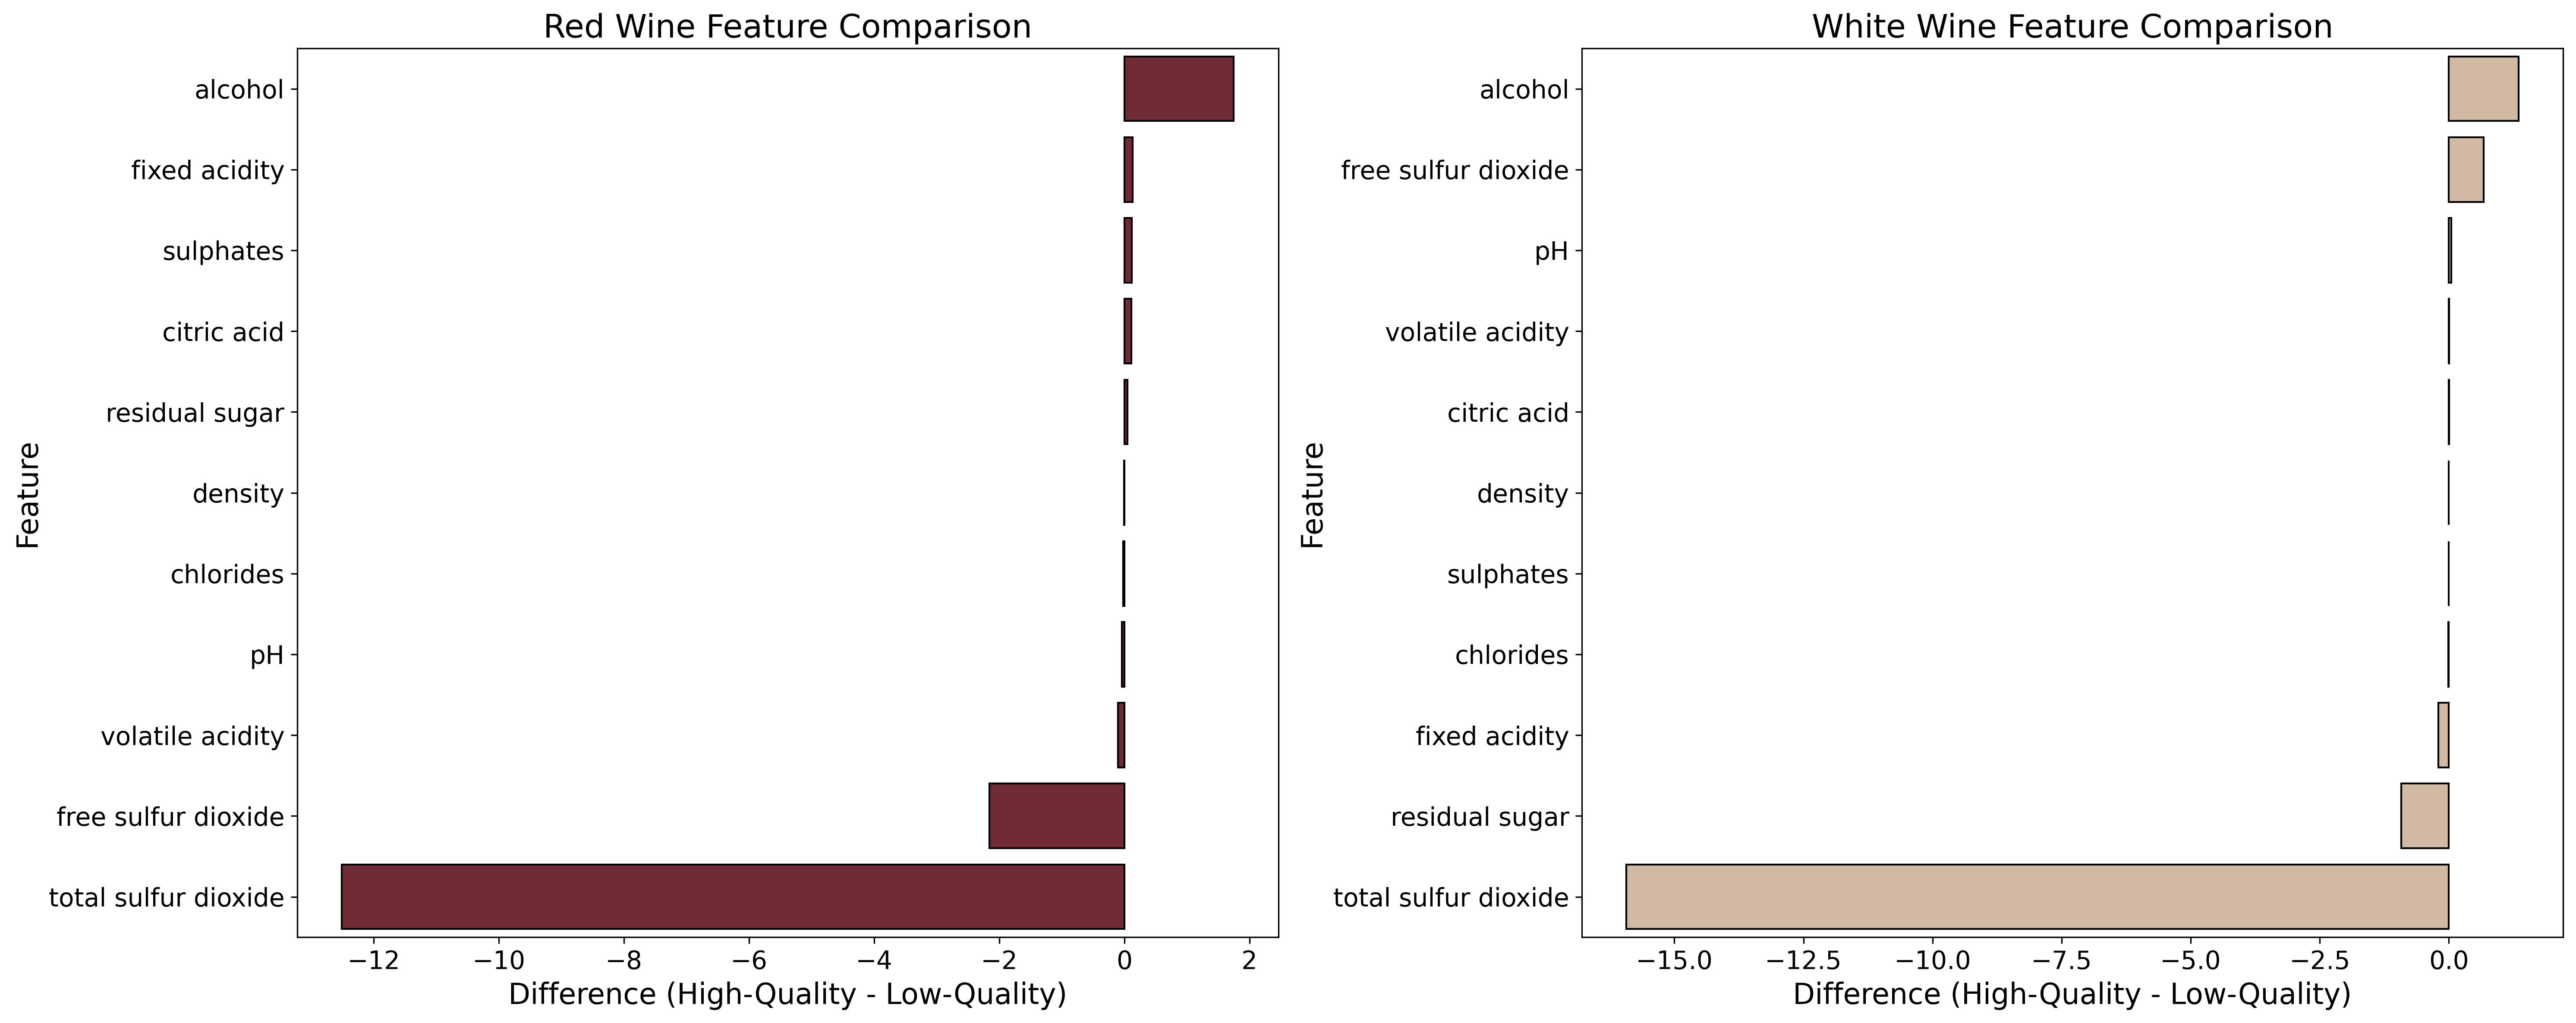

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Red wine feature comparison
sns.barplot(
    ax=axes[0],
    data=red_comparison_df,
    x="Difference (High-Quality - Low-Quality)",
    y="Feature",
    hue="Feature",
    dodge=False,
    palette={feature: "#7C1F30" for feature in red_comparison_df["Feature"]},
    edgecolor="black",
    legend=False
)
axes[0].set_title("Red Wine Feature Comparison", fontsize=18)
axes[0].set_xlabel("Difference (High-Quality - Low-Quality)", fontsize=16)
axes[0].set_ylabel("Feature", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

# White wine feature comparison
sns.barplot(
    ax=axes[1],
    data=white_comparison_df,
    x="Difference (High-Quality - Low-Quality)",
    y="Feature",
    hue="Feature",
    dodge=False,
    palette={feature: "#D9B99B" for feature in white_comparison_df["Feature"]},
    edgecolor="black",
    legend=False
)
axes[1].set_title("White Wine Feature Comparison", fontsize=18)
axes[1].set_xlabel("Difference (High-Quality - Low-Quality)", fontsize=16)
axes[1].set_ylabel("Feature", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()

plt.savefig("/content/drive/My Drive/wine_quality/images/q3.png", transparent=True)

**Red Wine:**

* **Alcohol:** High-quality red wines have a significantly higher average alcohol content (12.16) compared to low-quality red wines (10.41), with a difference of 1.75, making alcohol the most distinguishing feature for red wines.
* **Fixed Acidity:** High-quality red wines have slightly higher fixed acidity (8.44) compared to low-quality red wines (8.31), with a small difference of 0.13.
* **Sulphates:** High-quality red wines have higher sulphates (0.77) compared to low-quality red wines (0.66), with a difference of 0.12. Sulphates may contribute to better wine preservation and quality.
* **Citric Acid:** High-quality red wines have slightly more citric acid (0.38) compared to low-quality red wines (0.27), with a difference of 0.11.
Residual Sugar: High-quality red wines have marginally higher residual sugar (2.58) compared to low-quality red wines (2.52), with a minor difference of 0.05.
* **Density:** High-quality red wines have slightly lower density (0.9951) than low-quality red wines (0.9967), indicating a difference of -0.0016.
Chlorides: High-quality red wines have lower chlorides (0.0684) compared to low-quality red wines (0.0884), showing a difference of -0.0200.
* **pH:** High-quality red wines have a slightly lower pH (3.27) than low-quality red wines (3.31), with a difference of -0.0361.
Volatile Acidity: High-quality red wines have lower volatile acidity (0.43) compared to low-quality red wines (0.53), with a difference of -0.1031, indicating a smoother taste.
* **Free Sulfur Dioxide:** High-quality red wines have lower free sulfur dioxide (13.76) compared to low-quality red wines (15.92), with a difference of -2.16.
* **Total Sulfur Dioxide:** High-quality red wines have significantly lower total sulfur dioxide (34.47) compared to low-quality red wines (46.98), with a difference of -12.51, suggesting better natural quality.

**White Wine:**

* **Alcohol:** High-quality white wines have higher alcohol content (11.89) compared to low-quality white wines (10.54), with a difference of 1.35, making alcohol the most distinguishing feature for white wines.
* **Free Sulfur Dioxide:** High-quality white wines have slightly higher free sulfur dioxide (35.54) compared to low-quality white wines (34.87), with a difference of 0.67.
* **pH:** High-quality white wines have a slightly higher pH (3.24) compared to low-quality white wines (3.19), with a difference of 0.044, indicating slightly reduced acidity.
* **Volatile Acidity:** High-quality white wines have marginally higher volatile acidity (0.287) compared to low-quality white wines (0.280), with a difference of 0.007.
* **Citric Acid:** High-quality white wines have slightly more citric acid (0.337) compared to low-quality white wines (0.334), with a negligible difference of 0.003.
* **Density:** High-quality white wines have slightly lower density (0.9917) than low-quality white wines (0.9939), with a difference of -0.0021.
Sulphates: High-quality white wines have marginally lower sulphates (0.485) compared to low-quality white wines (0.491), with a negligible difference of -0.005.
* **Chlorides:** High-quality white wines have lower chlorides (0.0364) compared to low-quality white wines (0.0462), with a difference of -0.0098.
* **Fixed Acidity:** High-quality white wines have lower fixed acidity (6.64) compared to low-quality white wines (6.85), with a difference of -0.207.
* **Residual Sugar:** High-quality white wines have lower residual sugar (5.02) compared to low-quality white wines (5.95), with a difference of -0.925.
* **Total Sulfur Dioxide:** High-quality white wines have significantly lower total sulfur dioxide (121.81) compared to low-quality white wines (137.74), with a difference of -15.93.


**Alcohol Content:** The most prominent distinguishing feature for both red and white wines is alcohol content, with high-quality wines consistently having higher alcohol levels than low-quality wines.

**Sulfur Dioxide Levels:** High-quality wines, both red and white, have significantly lower total sulfur dioxide levels compared to low-quality wines, indicating better natural or organic processing.

**Acidity and pH:** High-quality red wines exhibit lower volatile acidity and pH, while high-quality white wines have slightly lower fixed acidity and a higher pH, indicating smoother taste profiles.

## How does the alcohol content distribution vary between high-quality and low-quality wines for red and white wine types? What are the differences in total sulfur dioxide content distribution between high-quality and low-quality wines for red and white wine types?


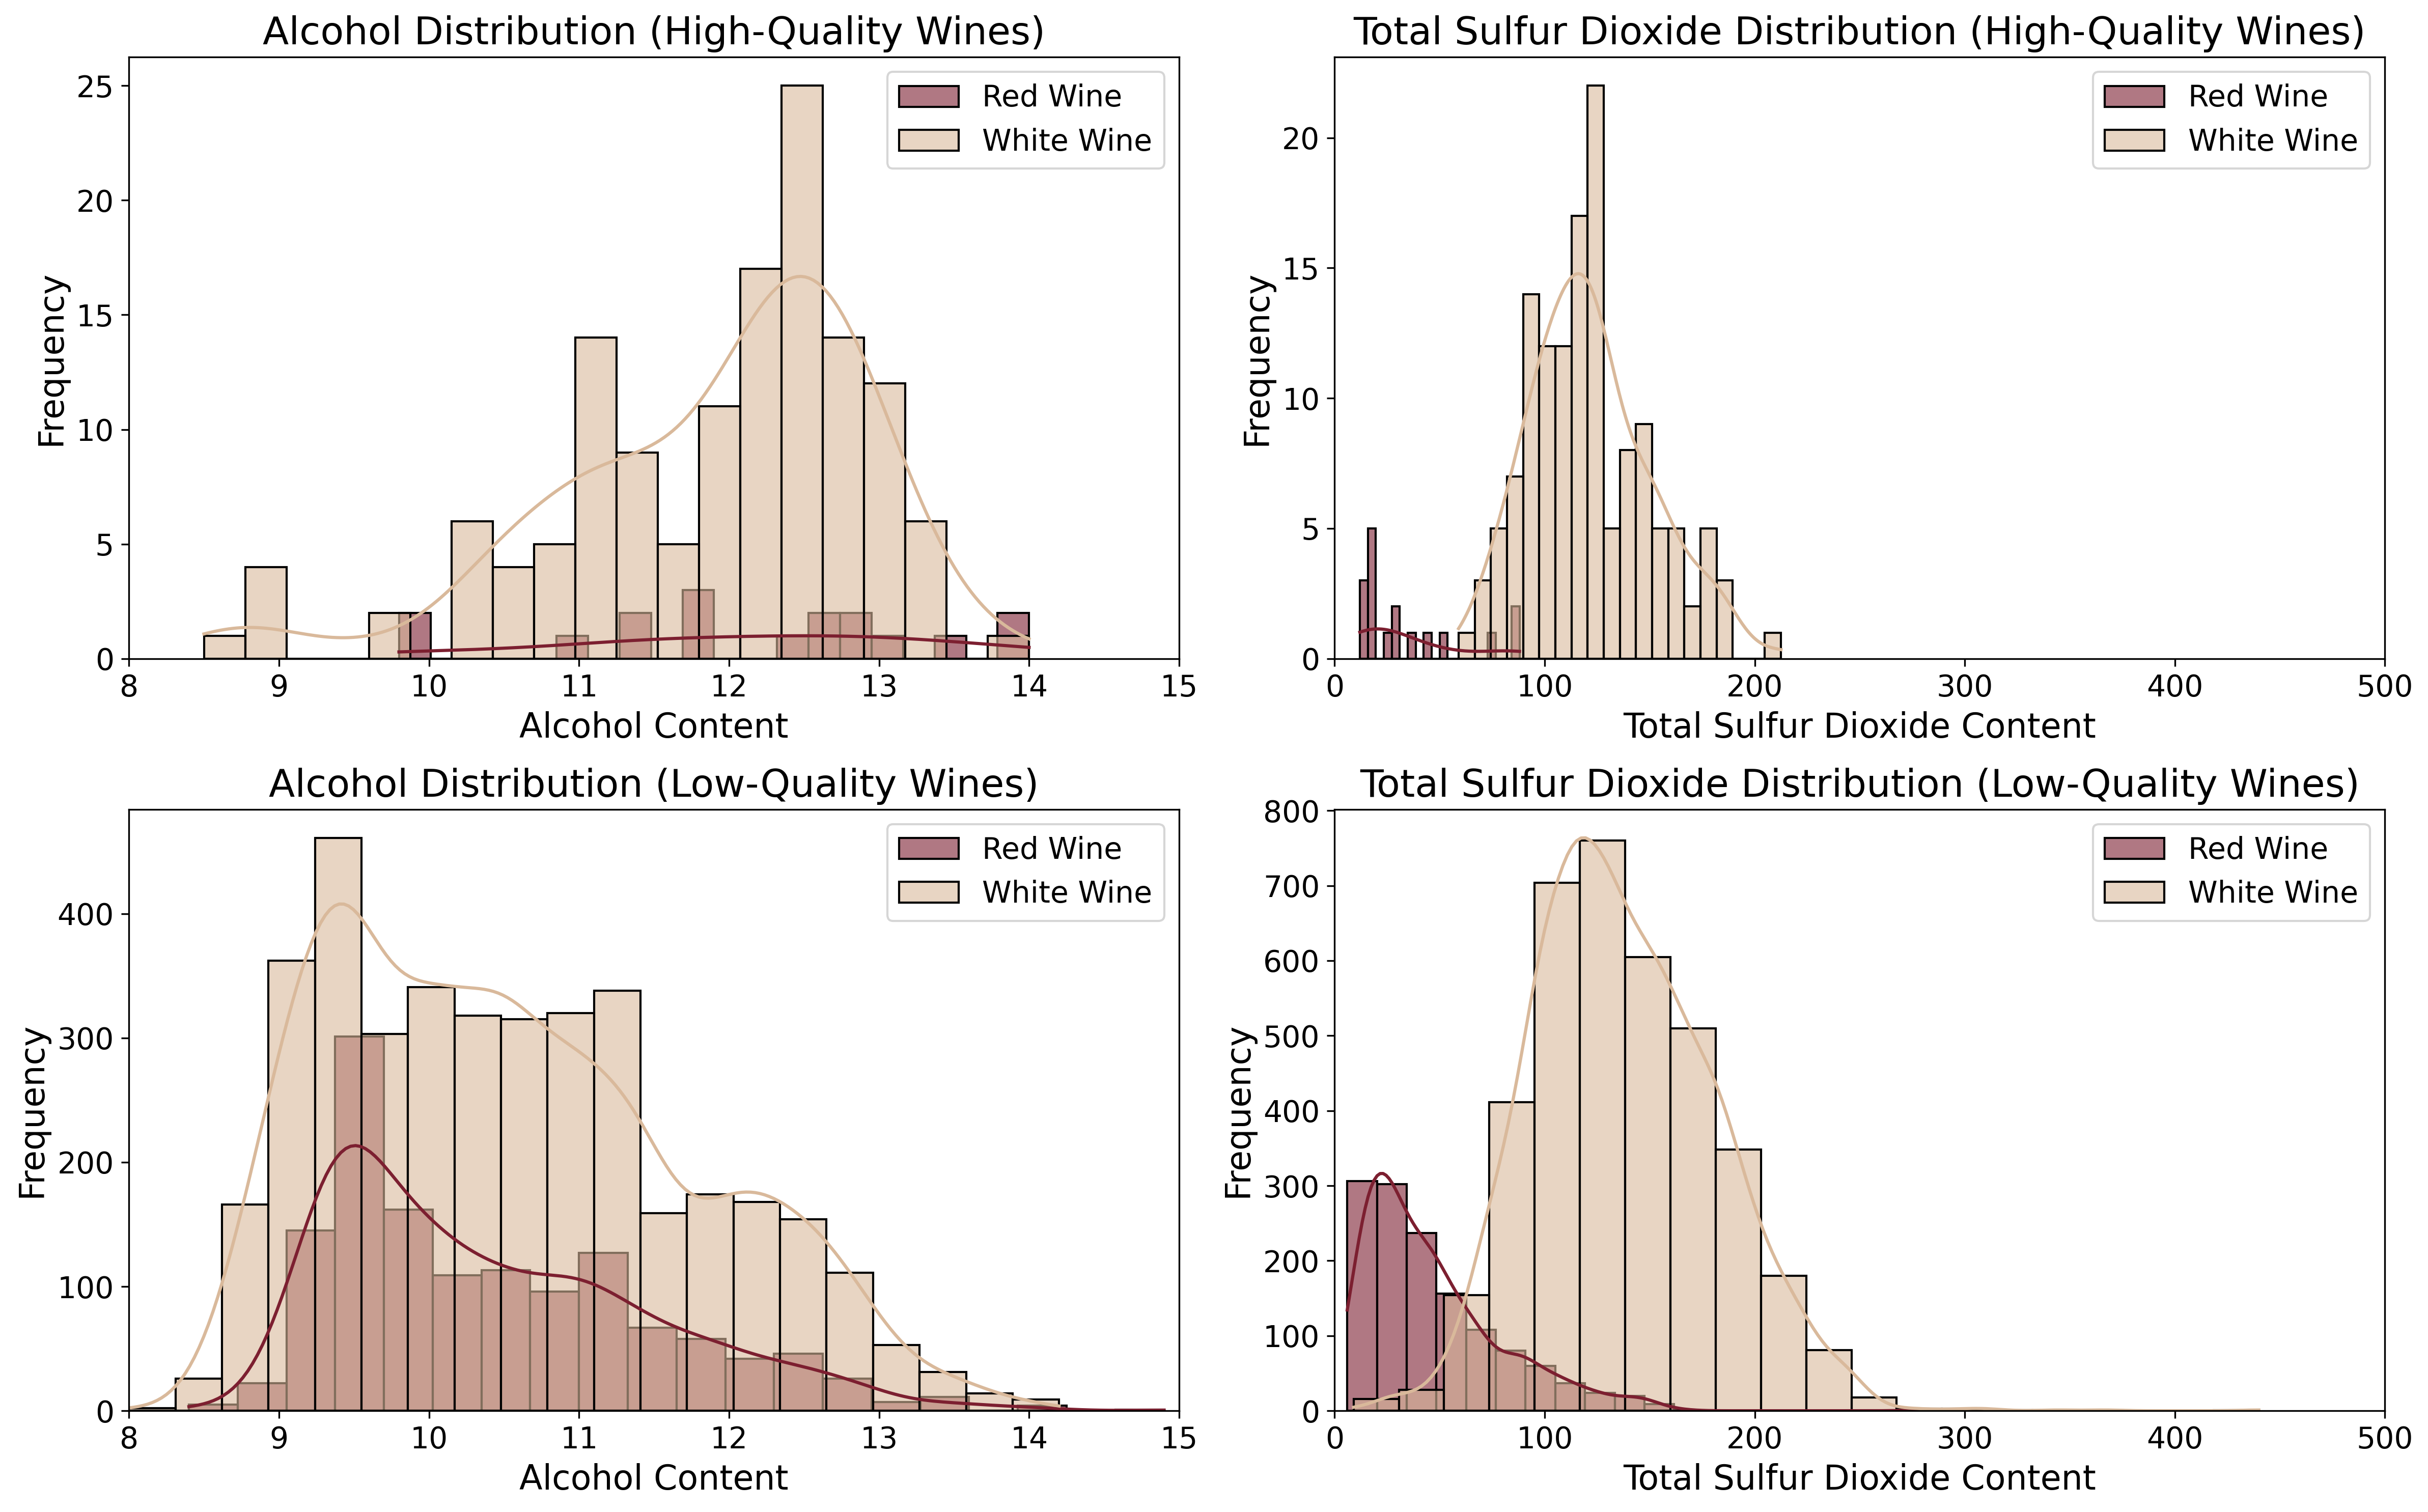

In [18]:
high_quality_wines = pd.concat([high_quality_red.assign(type="Red"), high_quality_white.assign(type="White")])
low_quality_wines = pd.concat([low_quality_red.assign(type="Red"), low_quality_white.assign(type="White")])

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=False, sharey=False)

# 1. High-quality wine: Alcohol distribution
sns.histplot(
    data=high_quality_wines[high_quality_wines["type"] == "Red"],
    x="alcohol",
    kde=True,
    bins=20,
    color="#7C1F30",
    label="Red Wine",
    edgecolor="black",
    alpha=0.6,
    ax=axes[0, 0]
)
sns.histplot(
    data=high_quality_wines[high_quality_wines["type"] == "White"],
    x="alcohol",
    kde=True,
    bins=20,
    color="#D9B99B",
    label="White Wine",
    edgecolor="black",
    alpha=0.6,
    ax=axes[0, 0]
)
axes[0, 0].set_xlim(8, 15)
axes[0, 0].set_title("Alcohol Distribution (High-Quality Wines)", fontsize=18)
axes[0, 0].set_xlabel("Alcohol Content", fontsize=16)
axes[0, 0].set_ylabel("Frequency", fontsize=16)
axes[0, 0].legend(fontsize=14)
axes[0, 0].tick_params(axis="both", labelsize=14)

# 2. High-quality wine: Total sulfur dioxide distribution
sns.histplot(
    data=high_quality_wines[high_quality_wines["type"] == "Red"],
    x="total sulfur dioxide",
    kde=True,
    bins=20,
    color="#7C1F30",
    label="Red Wine",
    edgecolor="black",
    alpha=0.6,
    ax=axes[0, 1]
)
sns.histplot(
    data=high_quality_wines[high_quality_wines["type"] == "White"],
    x="total sulfur dioxide",
    kde=True,
    bins=20,
    color="#D9B99B",
    label="White Wine",
    edgecolor="black",
    alpha=0.6,
    ax=axes[0, 1]
)
axes[0, 1].set_xlim(0, 500)
axes[0, 1].set_title("Total Sulfur Dioxide Distribution (High-Quality Wines)", fontsize=18)
axes[0, 1].set_xlabel("Total Sulfur Dioxide Content", fontsize=16)
axes[0, 1].set_ylabel("Frequency", fontsize=16)
axes[0, 1].legend(fontsize=14)
axes[0, 1].tick_params(axis="both", labelsize=14)

# 3. Low-quality wine: Alcohol distribution
sns.histplot(
    data=low_quality_wines[low_quality_wines["type"] == "Red"],
    x="alcohol",
    kde=True,
    bins=20,
    color="#7C1F30",
    label="Red Wine",
    edgecolor="black",
    alpha=0.6,
    ax=axes[1, 0]
)
sns.histplot(
    data=low_quality_wines[low_quality_wines["type"] == "White"],
    x="alcohol",
    kde=True,
    bins=20,
    color="#D9B99B",
    label="White Wine",
    edgecolor="black",
    alpha=0.6,
    ax=axes[1, 0]
)
axes[1, 0].set_xlim(8, 15)
axes[1, 0].set_title("Alcohol Distribution (Low-Quality Wines)", fontsize=18)
axes[1, 0].set_xlabel("Alcohol Content", fontsize=16)
axes[1, 0].set_ylabel("Frequency", fontsize=16)
axes[1, 0].legend(fontsize=14)
axes[1, 0].tick_params(axis="both", labelsize=14)

# 4. Low-quality wine: Total sulfur dioxide distribution
sns.histplot(
    data=low_quality_wines[low_quality_wines["type"] == "Red"],
    x="total sulfur dioxide",
    kde=True,
    bins=20,
    color="#7C1F30",
    label="Red Wine",
    edgecolor="black",
    alpha=0.6,
    ax=axes[1, 1]
)
sns.histplot(
    data=low_quality_wines[low_quality_wines["type"] == "White"],
    x="total sulfur dioxide",
    kde=True,
    bins=20,
    color="#D9B99B",
    label="White Wine",
    edgecolor="black",
    alpha=0.6,
    ax=axes[1, 1]
)
axes[1, 1].set_xlim(0, 500)
axes[1, 1].set_title("Total Sulfur Dioxide Distribution (Low-Quality Wines)", fontsize=18)
axes[1, 1].set_xlabel("Total Sulfur Dioxide Content", fontsize=16)
axes[1, 1].set_ylabel("Frequency", fontsize=16)
axes[1, 1].legend(fontsize=14)
axes[1, 1].tick_params(axis="both", labelsize=14)

plt.tight_layout()

plt.savefig("/content/drive/My Drive/wine_quality/images/q4.png", transparent=True)

**Alcohol Content:**

**High-Quality Wines:**

* **Red Wine:** The alcohol content distribution is higher for high-quality red wines, with a peak around 12%, indicating higher alcohol levels are characteristic of high-quality red wines.
* **White Wine:** The distribution is broader, with most high-quality white wines having alcohol content between 10.5% and 13%, peaking around 12%.

**Low-Quality Wines:**

* **Red Wine:** The alcohol content peaks around 10%, significantly lower than high-quality red wines, suggesting alcohol levels are an important quality indicator.
* **White Wine:** The distribution is more concentrated, peaking around 10.5% to 11%, with fewer samples exceeding 12%, reflecting lower alcohol levels for low-quality white wines.

**Total Sulfur Dioxide Content:**

**High-Quality Wines:**

* **Red Wine:** High-quality red wines have very low total sulfur dioxide content, primarily below 50 mg/L, indicating limited use of preservatives in higher-quality red wines.
* **White Wine:** The distribution is broader, with most values between 50 mg/L and 150 mg/L, showing higher sulfur dioxide levels than high-quality red wines.

**Low-Quality Wines:**

* **Red Wine:** Low-quality red wines show a wider range of sulfur dioxide content, with a significant number exceeding 100 mg/L, reflecting heavier use of preservatives.
* **White Wine:** The total sulfur dioxide content peaks between 100 mg/L and 150 mg/L, with some exceeding 200 mg/L, indicating a correlation between higher sulfur dioxide content and lower wine quality.

The **alcohol content distribution** for high-quality wines is slightly left-skewed, with most values concentrated in the upper range, suggesting a correlation between higher alcohol levels and better quality. In contrast, low-quality wines exhibit a right-skewed distribution, with most samples clustered in the lower alcohol ranges.

High-quality wines have a narrower, more symmetric distribution for **total sulfur dioxide**, indicating a more consistent range of values. Low-quality wines display a right-skewed distribution, especially white wines, with a significant number of samples in the higher sulfur dioxide range.

## References

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.